In [ ]:
#importing file using files from google colab
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving transfer_data.csv to transfer_data.csv


In [ ]:
#changing dictionary to utf-8 table or dataframe
import io
df = pd.read_csv(io.StringIO(uploaded['transfer_data.csv'].decode('utf-8')))
df_copy = df.copy()

In [ ]:
#creating functiont to return simple two dimensional line plot
import seaborn as sns
import matplotlib.pyplot as plt
def lineplot(a, b):
  figure = plt.figure(figsize = (22,8))
  sns.lineplot(x = a, y = b)
  return plt.show()


In [ ]:
df_copy.isnull().sum()
df_copy.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17


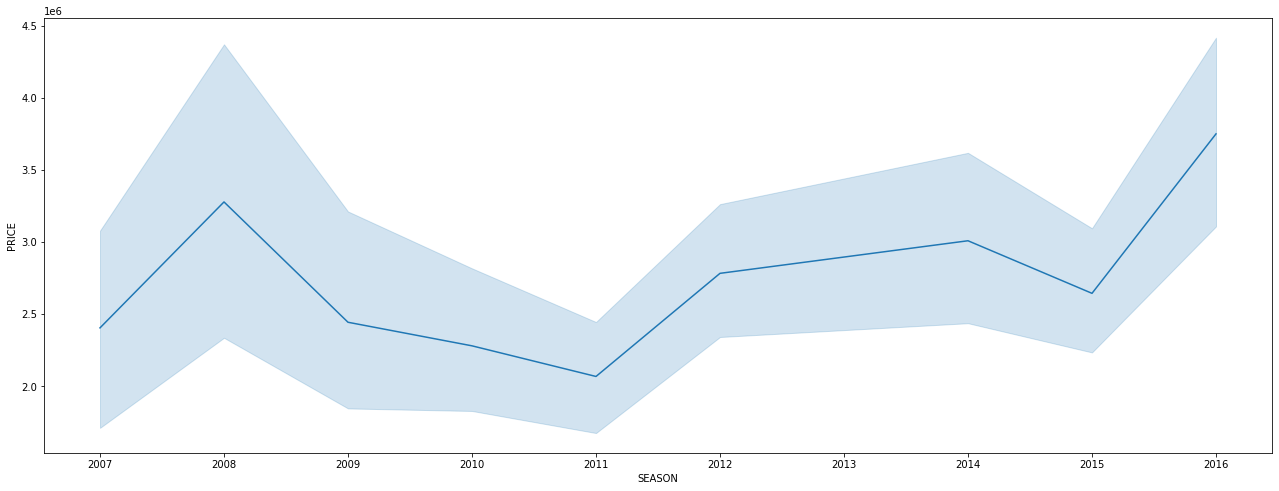

In [ ]:
#changing season format 
years = {'07/08' : '2007', '08/09' : '2008', '09/10' : '2009', '10/11': '2010', '11/12':'2011', '12/13': '2012', '13,14': '2013', '14/15': '2014', '15/16':'2015', '16/17' :'2016', '15':'2015', '16' : '2016'}
df_copy['SEASON']= df_copy['SEASON'].map(years)

#giving order to the categorical variables
df_copy['SEASON'] = pd.Categorical(df_copy['SEASON'], categories = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], ordered = True)
lineplot(df_copy.SEASON, df_copy.PRICE)

In [ ]:
price_df = df_copy[['SEASON', 'PRICE']]
price_df = df_copy.groupby('SEASON')['PRICE'].mean().reset_index()
price_df.head()

,SEASON,PRICE
0,2007,2.404864e+06
1,2008,3.278626e+06
2,2009,2.443855e+06
3,2010,2.280294e+06
4,2011,2.067769e+06


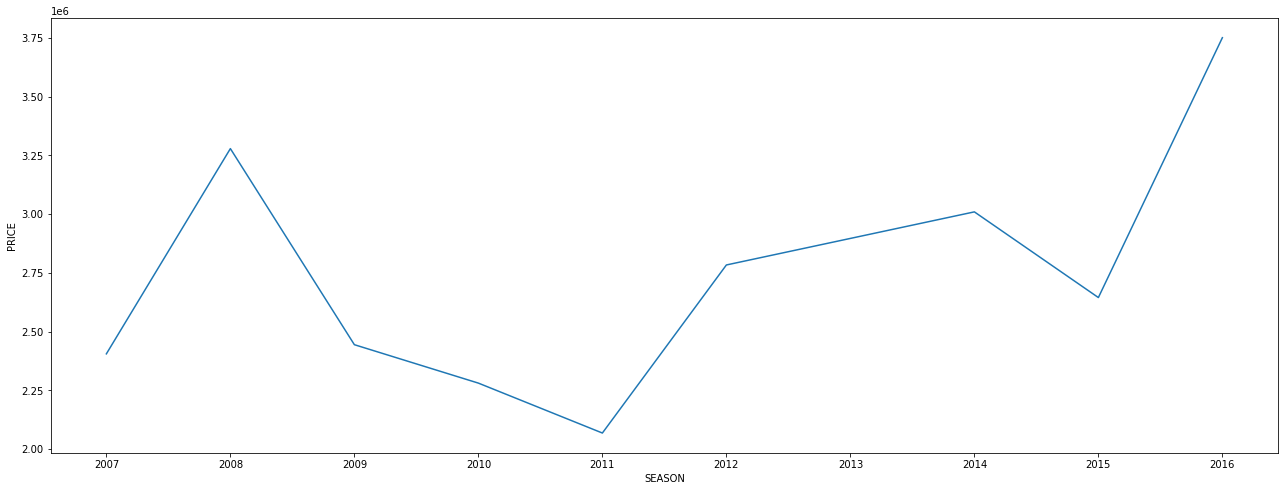

In [ ]:
lineplot(price_df['SEASON'], price_df['PRICE'] )

In [ ]:
#import pandas as pd
#ind = pd.date_range('01 / 01 / 2000', periods = 5, freq ='12H')
#print(ind)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 12:00:00',
               '2000-01-02 00:00:00', '2000-01-02 12:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='12H')


In [ ]:
import networkx as nx
import plotly.express as px
from_to = df_copy.loc[df_copy['SEASON'] == '2008'][['FROM', 'TO', 'PLAYER']]
from_to_count = from_to.groupby(['FROM', 'TO'])['PLAYER'].count().reset_index()
from_to_count.head()

,FROM,TO,PLAYER
0,AC Milan,Fiorentina,2
1,Ajax,Atletico Madrid,1
2,Ajax,Malaga,1
3,Ajax,Real Madrid,1
4,Almeria,Fiorentina,1


In [ ]:
from_to_count.describe()

,PLAYER
count,123.000000
mean,1.056911
std,0.232619
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
#creating graph network for each club
G1 = nx.from_pandas_edgelist(from_to_count, 'FROM', 'TO', edge_attr = 'PLAYER', create_using = nx.Graph())

In [ ]:
nx.info(G1)

'Graph with 91 nodes and 119 edges'

In [ ]:
#the number of unique connection
def uniqconnec(G):
  numuniqconnec = list(G1.degree())
  numuniqconnec = sorted(numuniqconnec, key = lambda x:x[1], reverse =  True)
  numuniqconnec = pd.DataFrame.from_dict(numuniqconnec)
  numuniqconnec.columns = (['club', 'numberofuniqueconnection'])
  return numuniqconnec
  

In [ ]:
uniqconnec(G1)

,club,numberofuniqueconnection
0,Fiorentina,11
1,Sampdoria,9
2,Real Madrid,8
3,Juventus,8
4,Torino,8
...,...,...
86,Tottenham,1
87,Toulouse,1
88,Treviso,1
89,Venezia,1


In [ ]:
#degree centrality
def deg_central(G):
  deg_cen = nx.degree_centrality(G)
  deg_cen_sort = sorted(deg_cen.items(), key = lambda x:x[1], reverse = True )
  deg_cen_sort = pd.DataFrame.from_dict(deg_cen_sort)
  deg_cen_sort.columns = (['club', 'degree centrality'])
  return deg_cen_sort


In [ ]:
deg_cen_sort = deg_central(G1)
deg_central(G1)

,club,degree centrality
0,Fiorentina,0.12
1,Sampdoria,0.10
2,Real Madrid,0.09
3,Juventus,0.09
4,Torino,0.09
...,...,...
86,Tottenham,0.01
87,Toulouse,0.01
88,Treviso,0.01
89,Venezia,0.01


In [ ]:
#eigenvector centrality
def eigen_central(G):
  eigen_cen = nx.eigenvector_centrality(G, weight = 'PLAYER')
  eigen_cen_sort = sorted(eigen_cen.items(), key = lambda x:x[1], reverse = True)
  eigen_cen_sort = pd.DataFrame.from_dict(eigen_cen_sort)
  eigen_cen_sort.columns = (['club', 'eigenvector centrality'])
  return eigen_cen_sort


In [ ]:
eigen_cen_sort = eigen_central(G1)
eigen_central(G1)

,club,eigenvector centrality
0,Fiorentina,0.49
1,Sampdoria,0.36
2,AC Milan,0.26
3,Torino,0.23
4,Catania,0.21
...,...,...
86,Internacional,0.00
87,Tottenham,0.00
88,Atlético Paranaense,0.00
89,NEC Nijmegen,0.00


In [ ]:
#betweenness cetrality
def betw_central(G):
  betwen_central = nx.betweenness_centrality(G, weight = 'PLAYER')
  betwen_central_sort = sorted(betwen_central.items(), key = lambda x: x[1], reverse = True)
  betwen_central_sort = pd.DataFrame.from_dict(betwen_central_sort)
  betwen_central_sort.columns = ('club', 'betweenness centrality')
  return betwen_central_sort

In [ ]:
betwen_central_sort = betw_central(G1)
betw_central(G1)

,club,betweenness centrality
0,Fiorentina,0.27
1,Juventus,0.24
2,Real Madrid,0.18
3,Sampdoria,0.16
4,Napoli,0.15
...,...,...
86,Tottenham,0.00
87,Toulouse,0.00
88,Treviso,0.00
89,Venezia,0.00
